# POC. Accuracy lower due to quality of data

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf

In [351]:
df = pd.read_excel('/Users/seeming.tan/Desktop/ABI_Files.xlsx', sheetname='Sheet1')

C:\Users\seeming.tan\AppData\Local\Continuum\anaconda3\envs\tensorflow-keras\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 57 columns):
CAT                           18 non-null object
NVIC                          18 non-null object
SEGMENT                       18 non-null object
COUNTRY OF ORIGIN             18 non-null object
YEAR                          18 non-null int64
MANUFACTURED                  18 non-null int64
DATE REL                      18 non-null datetime64[ns]
DATE DISC                     13 non-null datetime64[ns]
MAKE                          18 non-null object
FAMILY                        18 non-null object
VARIANT                       18 non-null object
SERIES                        11 non-null object
STYLE                         18 non-null object
ENGINE                        18 non-null object
CC                            18 non-null int64
TRANSMISSION                  18 non-null object
CYL                           18 non-null object
Peninsular Malaysia NEW PR    18 non-null int64
Pen

In [353]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Sabah & Sarawak NEW PR,18,1.000000
SERIES,7,0.388889
TYRES FRONT,6,0.333333
TYRES REAR,6,0.333333
DATE DISC,5,0.277778
WHEEL RIM REAR,2,0.111111
Sabah & Sarawak RRR,2,0.111111
WHEEL RIM FRONT,2,0.111111
TCIRCLE,1,0.055556
GVM,1,0.055556


In [354]:
zeros = (df == 0).astype(int).sum(axis=0)
zeros

CAT                            0
NVIC                           0
SEGMENT                        0
COUNTRY OF ORIGIN              0
YEAR                           0
MANUFACTURED                   0
DATE REL                       0
DATE DISC                      0
MAKE                           0
FAMILY                         0
VARIANT                        0
SERIES                         0
STYLE                          0
ENGINE                         0
CC                             0
TRANSMISSION                   0
CYL                            0
Peninsular Malaysia NEW PR     0
Peninsular Malaysia RRR        0
Sabah & Sarawak NEW PR         0
Sabah & Sarawak RRR            0
VALVE GEAR                     0
NO OF VALVES                   0
COMP RATIO                     0
BORE/STROKE                    0
KW                             0
TORQUE                         0
DRIVEN WHEEL                   0
GVM                           10
HEIGHT                         0
LENGTH    

In [355]:
#df.drop(['CAT','NVIC','Sabah & Sarawak NEW PR' ,'DATE REL', 'FAMILY', 'VARIANT' ,'SERIES' ,'BORE/STROKE','TYRES FRONT','TYRES REAR','DATE DISC','STEERING','WHEEL RIM REAR','WHEEL RIM FRONT' , 'GVM' , 'GCLEAR' , 'TCIRCLE', 'FUELHW' , 'FUELCY', 'RPM_KW', 'RPM_TORQUE','CLASS_CODE','MAKE_CODE','MODEL_CODE'], axis=1, inplace=True)
#df = df[['YEAR','MANUFACTURED','MAKE','STYLE','ENGINE','CC','TRANSMISSION','CYL','Peninsular Malaysia RRR','Sabah & Sarawak RRR','VALVE GEAR','NO OF VALVES','KW','TORQUE']]
df = df[['COUNTRY OF ORIGIN','YEAR','MANUFACTURED','MAKE','CC','CYL','Peninsular Malaysia RRR','Sabah & Sarawak RRR','NO OF VALVES','COMP RATIO','KW','TORQUE','DRIVEN WHEEL']]

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
COUNTRY OF ORIGIN          18 non-null object
YEAR                       18 non-null int64
MANUFACTURED               18 non-null int64
MAKE                       18 non-null object
CC                         18 non-null int64
CYL                        18 non-null object
Peninsular Malaysia RRR    18 non-null int64
Sabah & Sarawak RRR        16 non-null float64
NO OF VALVES               18 non-null int64
COMP RATIO                 18 non-null float64
KW                         18 non-null int64
TORQUE                     18 non-null int64
DRIVEN WHEEL               18 non-null object
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ KB


In [357]:
df = df.dropna()
df

,COUNTRY OF ORIGIN,YEAR,MANUFACTURED,MAKE,CC,CYL,Peninsular Malaysia RRR,Sabah & Sarawak RRR,NO OF VALVES,COMP RATIO,KW,TORQUE,DRIVEN WHEEL
0,MALAYSIA,2013,2010,HONDA,2354,4,74500,82100.0,16,10.5,133,222,FRONT WHEEL DRIVE
2,MALAYSIA,2008,2008,HONDA,1497,4,30000,34300.0,16,10.4,88,145,FRONT WHEEL DRIVE
4,MALAYSIA,2014,2014,PERODUA,998,3,14900,16300.0,12,11.0,49,90,FRONT WHEEL DRIVE
5,MALAYSIA,2001,2001,PERODUA,989,3,8200,9800.0,12,9.5,55,88,FRONT WHEEL DRIVE
6,MALAYSIA,2002,2001,PERODUA,989,3,8800,10400.0,12,9.5,55,88,FRONT WHEEL DRIVE
7,ITALY,2011,2009,ALFA ROMEO,2198,4,52900,59300.0,16,11.3,136,230,FRONT WHEEL DRIVE
8,ITALY,2012,2009,ALFA ROMEO,2198,4,57100,63400.0,16,11.3,136,230,FRONT WHEEL DRIVE
9,ITALY,2013,2009,ALFA ROMEO,2198,4,63100,69600.0,16,11.3,136,230,FRONT WHEEL DRIVE
10,ITALY,2014,2009,ALFA ROMEO,2198,4,67400,73500.0,16,11.3,136,230,FRONT WHEEL DRIVE
11,MALAYSIA,2007,2006,BMW,2497,6,49000,57100.0,24,11.0,160,250,REAR WHEEL DRIVE


In [358]:
df.isnull().any()

COUNTRY OF ORIGIN          False
YEAR                       False
MANUFACTURED               False
MAKE                       False
CC                         False
CYL                        False
Peninsular Malaysia RRR    False
Sabah & Sarawak RRR        False
NO OF VALVES               False
COMP RATIO                 False
KW                         False
TORQUE                     False
DRIVEN WHEEL               False
dtype: bool

# ASSUMING WE KNOW Peninsular Malaysia New Price

### Predict Peninsular Malaysia Recommend Retail Rate

In [421]:
PMRRR = pd.get_dummies(df)
print(PMRRR.shape)

(16, 24)


In [426]:
from sklearn.model_selection import train_test_split
y = PMRRR['Peninsular Malaysia RRR']
X = PMRRR[PMRRR.columns.difference(['Peninsular Malaysia RRR','Sabah & Sarawak RRR'])]

In [416]:
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

In [417]:
X = min_max_normalized(X)

In [418]:
X = X.dropna(axis=1)

In [430]:
df.corr()

,YEAR,MANUFACTURED,CC,Peninsular Malaysia RRR,Sabah & Sarawak RRR,NO OF VALVES,COMP RATIO,KW,TORQUE
YEAR,1.000000,0.949068,0.492124,0.646509,0.642830,0.143318,0.514692,0.555496,0.586225
MANUFACTURED,0.949068,1.000000,0.462264,0.706009,0.703612,0.209597,0.364071,0.559705,0.615813
CC,0.492124,0.462264,1.000000,0.694751,0.699491,0.865615,0.293138,0.963347,0.924441
Peninsular Malaysia RRR,0.646509,0.706009,0.694751,1.000000,0.999939,0.540677,-0.123682,0.844305,0.903746
Sabah & Sarawak RRR,0.642830,0.703612,0.699491,0.999939,1.000000,0.548374,-0.123821,0.848370,0.907014
NO OF VALVES,0.143318,0.209597,0.865615,0.540677,0.548374,1.000000,0.083869,0.829438,0.786972
COMP RATIO,0.514692,0.364071,0.293138,-0.123682,-0.123821,0.083869,1.000000,0.173278,0.092201
KW,0.555496,0.559705,0.963347,0.844305,0.848370,0.829438,0.173278,1.000000,0.987650
TORQUE,0.586225,0.615813,0.924441,0.903746,0.907014,0.786972,0.092201,0.987650,1.000000


In [428]:
vif

[inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 41.698529411764646]

In [364]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [365]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [366]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

In [367]:
from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.972354593719873e+17
MSE: 1.8278575348406834e+36
RMSE: 1.3519828160301015e+18


In [368]:
print(predictions)

[[-1.13447911e+18]
 [-2.45446273e+18]
 [ 2.66240000e+04]
 [ 2.83648000e+05]]


In [369]:
print(y_test)

0      74500
2      30000
7      52900
16    269400
Name: Peninsular Malaysia RRR, dtype: int64


In [370]:
rf_model = RandomForestRegressor()

In [38]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [311]:
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.6min finished
C:\Users\seeming.tan\AppData\Local\Continuum\anaconda3\envs\tensorflow-keras\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_st...


In [312]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [371]:
rf_model = RandomForestRegressor(n_estimators= 400,
                                 min_samples_split= 5,
                                 min_samples_leaf= 1,
                                 max_features= 'sqrt',
                                 max_depth= 30,
                                 bootstrap= True)

rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
predictions = predictions.reshape(-1,1)

In [372]:
predictions

array([[ 43662.24097222],
       [ 39077.64345238],
       [ 57423.36884921],
       [240730.26954365]])

In [373]:
y_test

0      74500
2      30000
7      52900
16    269400
Name: Peninsular Malaysia RRR, dtype: int64

In [374]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 18277.125446428545
MSE: 468946325.6723814
RMSE: 21655.16856716616


In [375]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf_model, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist(),top=300)

Weight,Feature
0.0652 ± 0.0158,KW
0.0592 ± 0.0117,CC
0.0563 ± 0.0476,MAKE_AUDI
0.0492 ± 0.0436,CYL_TV6
0.0445 ± 0.0110,DRIVEN WHEEL_ALL WHEEL DRIVE
0.0407 ± 0.0662,TORQUE
0.0304 ± 0.0452,COUNTRY OF ORIGIN_GERMANY
0.0262 ± 0.0064,MANUFACTURED
0.0127 ± 0.0144,YEAR
0.0060 ± 0.0038,COUNTRY OF ORIGIN_MALAYSIA


In [377]:
import tensorflow as tf
l0 = tf.keras.layers.Dense(units=4, input_shape=[22])  
l1 = tf.keras.layers.Dense(units=4)  
l2 = tf.keras.layers.Dense(units=1)  
model = tf.keras.Sequential([l0, l1, l2])

In [378]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [379]:
history = model.fit(X_train, y_train, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


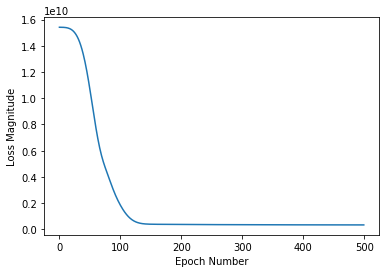

In [380]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [381]:
print(model.predict([X_test]))
prediction = model.predict([X_test])

[[ 64123.38 ]
 [ 33230.684]
 [ 59573.332]
 [285179.38 ]]


In [382]:
print(y_test)

0      74500
2      30000
7      52900
16    269400
Name: Peninsular Malaysia RRR, dtype: int64


In [383]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 9015.0029296875
MSE: 102908404.39902878
RMSE: 10144.377970039799


### Predict Sabah RRR

In [384]:
SRRR = pd.get_dummies(df)
print(SRRR.shape)

(16, 24)


In [385]:
from sklearn.model_selection import train_test_split
y = SRRR['Sabah & Sarawak RRR']
X = SRRR[SRRR.columns.difference(['Peninsular Malaysia RRR','Sabah & Sarawak RRR'])]

In [386]:
X = min_max_normalized(X)

In [387]:
X = X.dropna(axis=1)

In [388]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [389]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [390]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

In [391]:
from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9.542422895346403e+17
MSE: 2.0675061234525875e+36
RMSE: 1.437882513786362e+18


In [392]:
print(predictions)

[[-1.20655947e+18]
 [-2.61040969e+18]
 [ 3.17440000e+04]
 [ 3.12320000e+05]]


In [393]:
print(y_test)

0      82100.0
2      34300.0
7      59300.0
16    297300.0
Name: Sabah & Sarawak RRR, dtype: float64


In [394]:
rf_model = RandomForestRegressor(n_estimators= 400,
                                 min_samples_split= 5,
                                 min_samples_leaf= 1,
                                 max_features= 'sqrt',
                                 max_depth= 30,
                                 bootstrap= True)

rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
predictions = predictions.reshape(-1,1)

In [395]:
predictions

array([[ 50428.99878247],
       [ 44896.91574675],
       [ 64825.29630231],
       [266333.29255952]])

In [396]:
y_test

0      82100.0
2      34300.0
7      59300.0
16    297300.0
Name: Sabah & Sarawak RRR, dtype: float64

In [397]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19689.98017676769
MSE: 526203202.5992712
RMSE: 22939.119481777656


In [399]:
import tensorflow as tf
l0 = tf.keras.layers.Dense(units=4, input_shape=[22])  
l1 = tf.keras.layers.Dense(units=4)  
l2 = tf.keras.layers.Dense(units=1)  
model = tf.keras.Sequential([l0, l1, l2])

In [400]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [401]:
history = model.fit(X_train, y_train, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


In [402]:
print(model.predict([X_test]))
prediction = model.predict([X_test])

[[ 70871.53]
 [ 37065.48]
 [ 65741.84]
 [313027.88]]


In [403]:
y_test

0      82100.0
2      34300.0
7      59300.0
16    297300.0
Name: Sabah & Sarawak RRR, dtype: float64

In [404]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 9040.9169921875
MSE: 105647448.90195084
RMSE: 10278.494486156562


# PREDICTING NEW CAR PRICE

In [349]:
NPR = pd.get_dummies(df)
print(NPR.shape)

(16, 32)


In [ ]:
from sklearn.model_selection import train_test_split
y = NPR['Peninsular Malaysia NEW PR']
X = NPR[NPR.columns.difference(['Peninsular Malaysia RRR','Sabah & Sarawak RRR','Peninsular Malaysia NEW PR'])]

In [158]:
X = min_max_normalized(X)
X = X.dropna(axis=1)

C:\Users\seeming.tan\AppData\Local\Continuum\anaconda3\envs\tensorflow-keras\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [159]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [160]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [161]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

In [162]:
from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 51165.4348011408
MSE: 4514655402.12991
RMSE: 67191.18544965486


In [163]:
print(predictions)

[[231059.50137308]
 [211026.37419512]
 [206736.36363636]
 [671816.5       ]]


In [164]:
y_test

0     170906
2      92283
7     195888
16    656900
Name: Peninsular Malaysia NEW PR, dtype: int64

In [165]:
rf_model = RandomForestRegressor(n_estimators= 400,
                                 min_samples_split= 5,
                                 min_samples_leaf= 1,
                                 max_features= 'sqrt',
                                 max_depth= 30,
                                 bootstrap= True)

rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
predictions = predictions.reshape(-1,1)

In [166]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 49426.8162126623
MSE: 3130230921.55774
RMSE: 55948.46665957647


In [167]:
predictions

array([[223902.42907882],
       [181327.81710516],
       [212905.05073656],
       [618251.0320699 ]])

In [168]:
y_test

0     170906
2      92283
7     195888
16    656900
Name: Peninsular Malaysia NEW PR, dtype: int64

In [172]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[73])  
l1 = tf.keras.layers.Dense(units=4)  
l2 = tf.keras.layers.Dense(units=1)  
model = tf.keras.Sequential([l0, l1, l2])

In [173]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(X_train, y_train, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


In [174]:
print(model.predict([X_test]))
prediction = model.predict([X_test])

[[239439.08]
 [162489.31]
 [193539.86]
 [671784.9 ]]


In [175]:
y_test

0     170906
2      92283
7     195888
16    656900
Name: Peninsular Malaysia NEW PR, dtype: int64

In [176]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 38993.1015625
MSE: 2463195595.0738525
RMSE: 49630.591323032335
